# Introduction

<p style="font-size: 20px; font-family:'Times New Roman'">
In today's data-driven world, the application of machine learning techniques to diverse datasets holds immense potential for uncovering valuable insights and enhancing predictive capabilities. This project aims to classify mushrooms as poisonous or edible based on their physical characteristics. Utilizing a dataset from the UCI Machine Learning Repository, I embarked on a journey to build and evaluate various machine learning models.
    </p>

<p style="font-size: 20px; font-family:'Times New Roman'">
My approach involved a thorough data preprocessing phase, including cleaning, handling missing values, and exploring the data through visualization. I performed feature engineering to enhance the dataset's predictive power. I then implemented and assessed multiple classification algorithms to determine the most effective model. By the end of this project, I aimed to achieve high accuracy in mushroom classification and gain a deeper understanding of the significant features influencing the model's decisions.
    </p>


**Data Source:**  
Wagner, Dennis, Heider,D., and Hattab,Georges. (2023). Secondary Mushroom. UCI Machine Learning Repository.

https://doi.org/10.24432/C5FP5Q.

# Data Preprocessing & Exploratory Data Analysis (EDA)

### Necessary Libraries

In [1]:
!pip install ucimlrepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Data Loading

In [2]:
secondary_mushroom = fetch_ucirepo(id=848)

X_raw = secondary_mushroom.data.features
y_raw = secondary_mushroom.data.targets

df_raw = X_raw.copy()
df_raw['class'] = y_raw

Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

## Data Cleaning and EDA

#### Exploring the data

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [4]:
df_raw.sample(5)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
25226,13.11,x,s,w,f,a,d,y,5.15,19.45,...,NaN,w,NaN,NaN,f,f,w,d,w,e
57464,1.58,o,k,n,f,NaN,NaN,n,3.31,1.47,...,NaN,n,NaN,NaN,f,f,NaN,d,u,p
32045,3.33,x,k,n,f,s,NaN,p,4.00,2.83,...,NaN,n,NaN,NaN,f,f,p,g,a,p
56468,7.81,o,t,o,f,NaN,c,y,1.40,11.68,...,NaN,y,NaN,NaN,f,f,NaN,d,w,p
2254,7.18,b,t,w,f,e,c,w,12.60,12.23,...,y,w,u,w,t,e,NaN,d,u,p


In [5]:
df_raw.nunique()

cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
class                      2
dtype: int64

In [6]:
df_raw[df_raw.duplicated()]

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
9863,1.14,x,g,w,f,a,d,w,3.13,1.78,...,NaN,e,NaN,NaN,f,f,NaN,d,u,p
12978,0.72,x,g,y,f,NaN,NaN,y,3.51,0.77,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
56526,4.27,o,s,n,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
56533,4.29,o,t,w,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
56576,4.59,o,s,w,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58237,2.94,o,l,g,f,f,f,f,0.00,0.00,...,f,f,NaN,NaN,f,f,NaN,d,u,p
58239,3.30,o,l,g,f,f,f,f,0.00,0.00,...,f,f,NaN,NaN,f,f,NaN,d,u,p
58241,3.13,o,l,g,f,f,f,f,0.00,0.00,...,f,f,NaN,NaN,f,f,NaN,d,w,p
58242,2.83,o,l,g,f,f,f,f,0.00,0.00,...,f,f,NaN,NaN,f,f,NaN,d,u,p


In [7]:
df_raw.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
class                       0
dtype: int64

#### Handling the missing, duplicated values and unnecassary columns

In [8]:
df = df_raw.drop(['veil-type', 'spore-print-color', 'veil-color', 'stem-surface', 'stem-root', 'gill-spacing', 'cap-surface'], axis=1)
df = df.drop_duplicates()

gill_attachment_mode = df['gill-attachment'].mode()[0] # 'a'
df['gill-attachment'] = df['gill-attachment'].fillna(gill_attachment_mode)

ring_type_mode = df['ring-type'].mode()[0] # 'f'
df['ring-type'] = df['ring-type'].fillna(ring_type_mode)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60903 entries, 0 to 61068
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          60903 non-null  float64
 1   cap-shape             60903 non-null  object 
 2   cap-color             60903 non-null  object 
 3   does-bruise-or-bleed  60903 non-null  object 
 4   gill-attachment       60903 non-null  object 
 5   gill-color            60903 non-null  object 
 6   stem-height           60903 non-null  float64
 7   stem-width            60903 non-null  float64
 8   stem-color            60903 non-null  object 
 9   has-ring              60903 non-null  object 
 10  ring-type             60903 non-null  object 
 11  habitat               60903 non-null  object 
 12  season                60903 non-null  object 
 13  class                 60903 non-null  object 
dtypes: float64(3), object(11)
memory usage: 7.0+ MB


#### Data Visualization

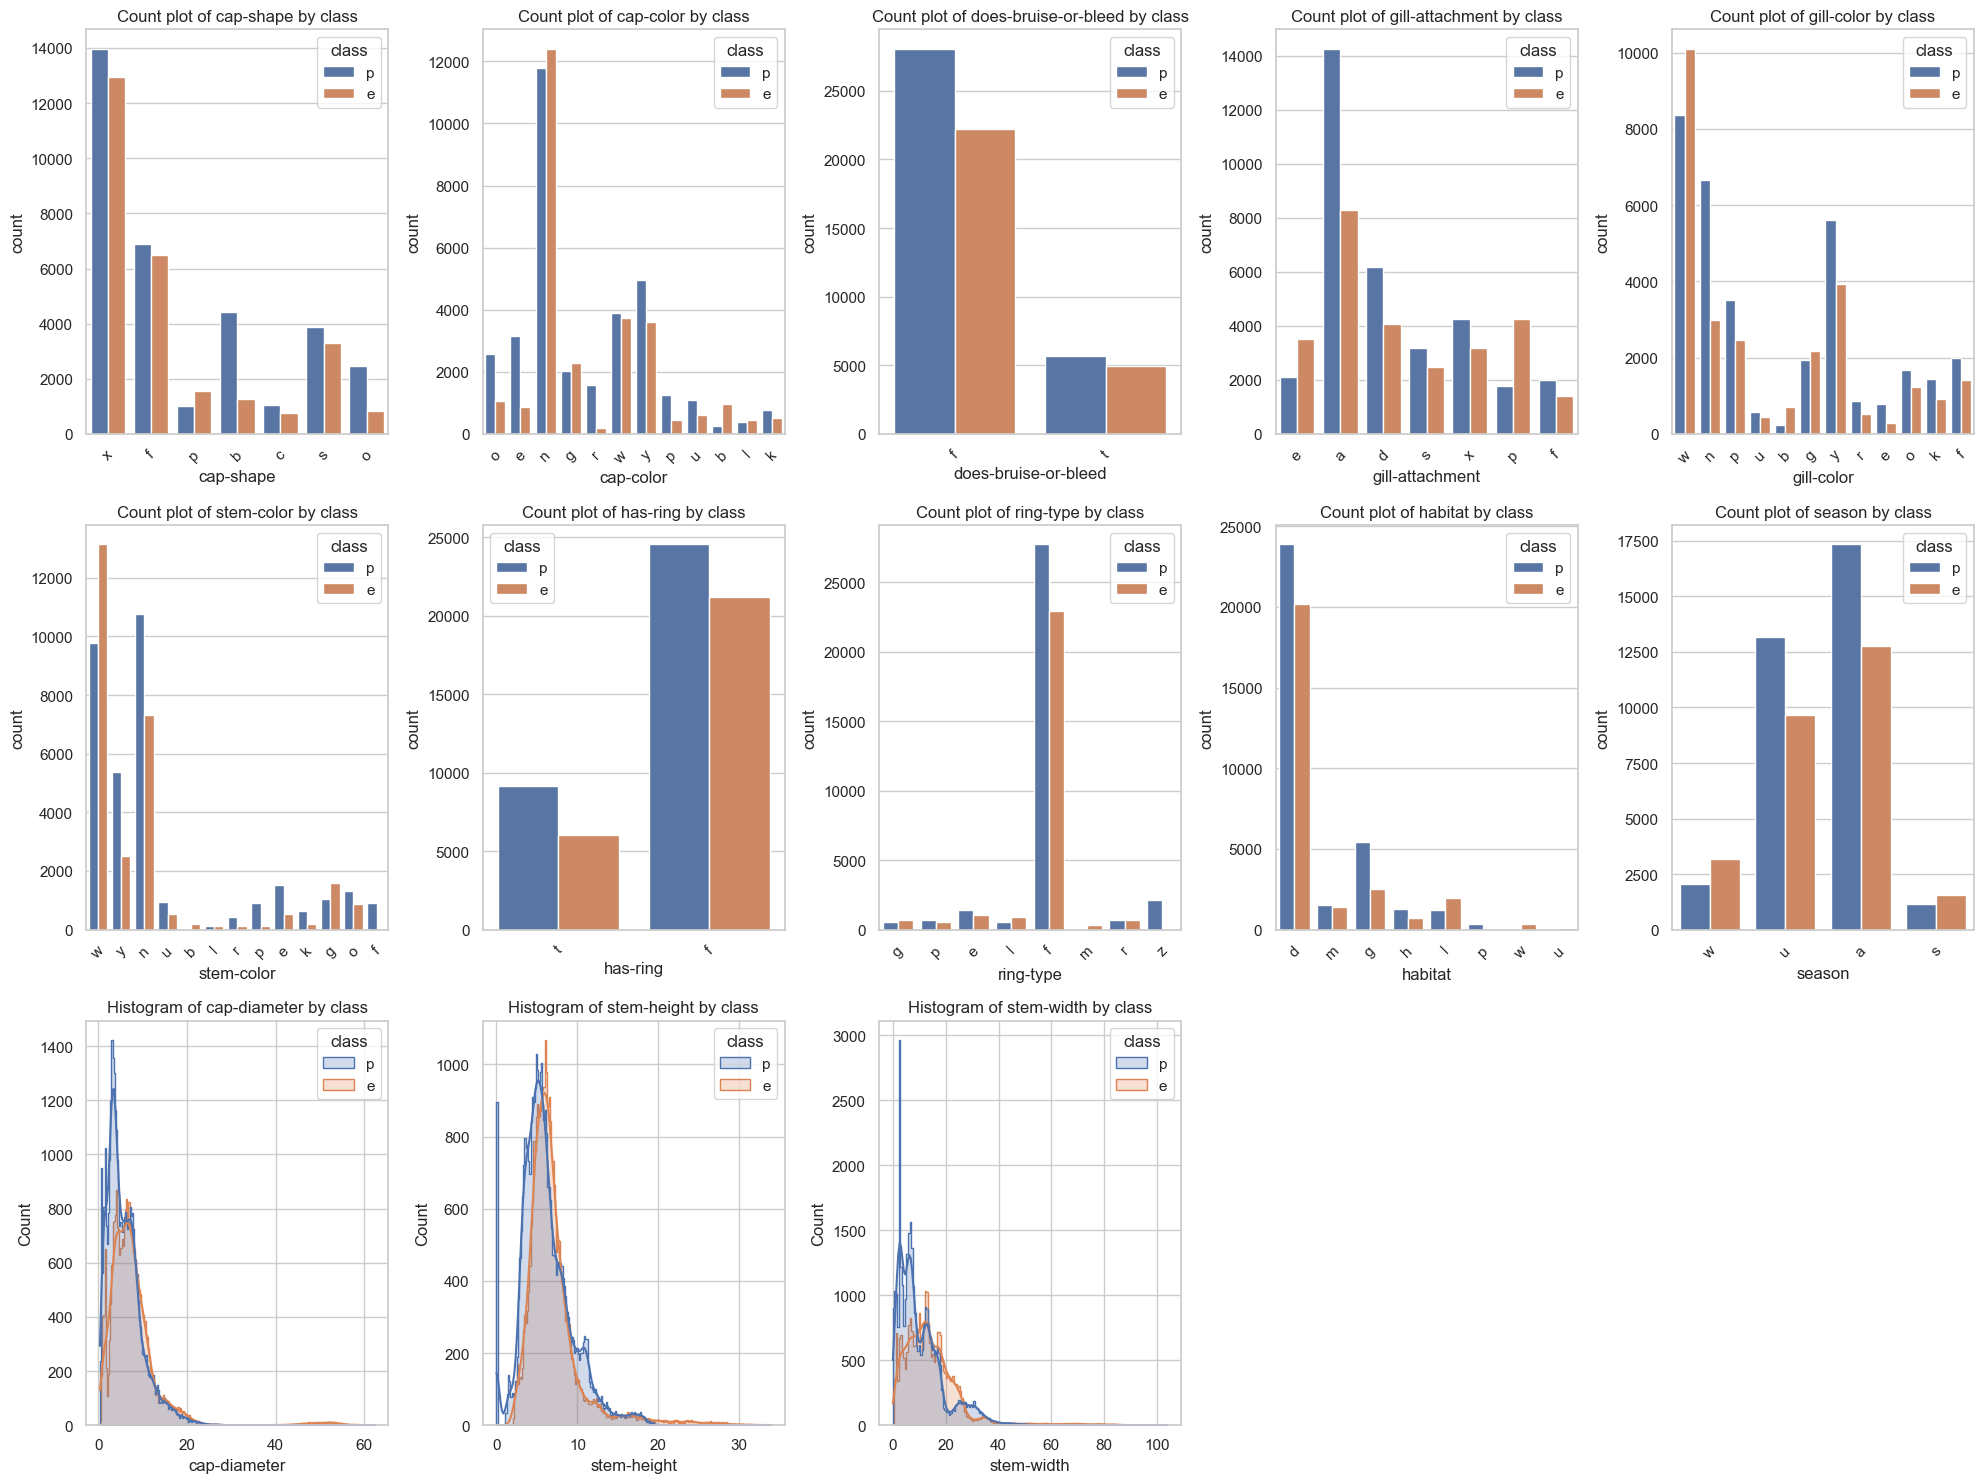

In [9]:
# List of categorical and numerical columns
categorical_columns = [
    'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment',
    'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'
]

numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

# Combine all columns into a single list for plotting
all_columns = categorical_columns + numerical_columns

# Set up the 3x4 grid for subplots
fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()

# Plot count plots for categorical columns
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, hue='class', ax=axes[i])
    axes[i].set_title(f'Count plot of {column} by class')
    axes[i].tick_params(axis='x', rotation=45)

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns, start=len(categorical_columns)):
    sns.histplot(data=df, x=column, hue='class', kde=True, element="step", ax=axes[i])
    axes[i].set_title(f'Histogram of {column} by class')

# Hide any unused subplots
for j in range(len(all_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Feature Engineering

In [10]:
#Interaction features capture relationships between different features.
df['cap-diameter_x_stem-height'] = df['cap-diameter'] * df['stem-height']
df['cap-diameter_x_stem-width'] = df['cap-diameter'] * df['stem-width']
df['stem-height_x_stem-width'] = df['stem-height'] * df['stem-width']

df.drop(['cap-diameter', 'stem-height', 'stem-width'], axis=1, inplace=True)

# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ['cap-diameter_x_stem-height', 'cap-diameter_x_stem-width', 'stem-height_x_stem-width']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Outlier Detection
print(f'Before detecting shape: {df.shape}')
b_x = df.shape[0]
z_scores = stats.zscore(df[numerical_features])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
print(f'After detecting shape: {df.shape}')
print(f'{b_x - df.shape[0]} outliers dropped.\n')

# Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season', 'class']
for col in categorical_cols:
    print(df[col].unique())
    df[col] = label_encoder.fit_transform(df[col])
    print(df[col].unique())
    print()

Before detecting shape: (60903, 14)
After detecting shape: (58910, 14)
1993 outliers dropped.

['f' 'x' 'p' 'b' 'c' 's' 'o']
[2 6 4 0 1 5 3]

['e' 'o' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
[ 1  6  5  2  8 10 11  7  9  0  4  3]

['f' 't']
[0 1]

['e' 'a' 'd' 's' 'x' 'p' 'f']
[2 0 1 5 6 4 3]

['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
[10  5  7  9  0  3 11  8  1  6  4  2]

['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
[11 12  6 10  0  5  9  8  1  4  3  7  2]

['t' 'f']
[1 0]

['p' 'g' 'e' 'l' 'f' 'm' 'r' 'z']
[5 2 0 3 1 4 6 7]

['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
[0 4 1 2 3 5 7 6]

['w' 'a' 'u' 's']
[3 0 2 1]

['p' 'e']
[1 0]



| Feature Name          | Without Labeling                                | With Labeling               |
|-----------------------|--------------------------------------------------|-----------------------------|
| cap-shape             | ['x' 'f' 'p' 'b' 'c' 's' 'o']                    | [6 2 4 0 1 5 3]             |
| cap-color             | ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']| [6 1 5 2 8 10 11 7 9 0 4 3] |
| does-bruise-or-bleed  | ['f' 't']                                        | [0 1]                       |
| gill-attachment       | ['e' 'a' 'd' 's' 'x' 'p' 'f']                    | [2 0 1 5 6 4 3]             |
| gill-color            | ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']| [10 5 7 9 0 3 11 8 1 6 4 2] |
| stem-color            | ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f'] | [11 12 6 10 0 5 9 8 1 4 3 7 2] |
| has-ring              | ['t' 'f']                                        | [1 0]                       |
| ring-type             | ['g' 'p' 'e' 'l' 'f' 'm' 'r' 'z']                | [2 5 0 3 1 4 6 7]           |
| habitat               | ['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']                | [0 4 1 2 3 5 7 6]           |
| season                | ['w' 'u' 'a' 's']                                | [3 2 0 1]                   |
| class                 | ['p' 'e']                                        | [1 0]                       |

# Machine Learning Applications

In [12]:
# Split the data into training and testing sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=302)

# Initialize models and their hyperparameters for GridSearchCV
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {"C": [0.01, 0.1, 1, 10, 100]}),
    "Naive Bayes": (GaussianNB(), {"var_smoothing": np.logspace(0,-9, num=100)}),
    "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [None, 10, 20, 30, 40]}),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7, 9]}),
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20, 30]})
}

# Results dictionary
results = {
    "Model": [],
    "Best Model": [],
    "Best Parameters": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "TP": [],
    "TN": [],
    "FP": [],
    "FN": []
}

# Train, tune and evaluate models
model_num = 1
for name, (model, params) in models.items():
    print(f'{name} Tuning ({model_num}/5) started!')
    start_time = time.time()
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Store results
    results["Model"].append(name)
    results["Best Model"].append(best_model)
    results["Best Parameters"].append(grid_search.best_params_)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)
    results["TP"].append(tp)
    results["TN"].append(tn)
    results["FP"].append(fp)
    results["FN"].append(fn)

    print(f'{name} finished!')
    print(f'Accuracy: {round(accuracy*100, 2)}%')
    end_time = time.time()
    training_time = end_time - start_time
    train_min = training_time // 60
    train_sec = round(training_time % 60, 2)
    print(f'Training time: {train_min} minutes {train_sec} seconds\n')
    model_num += 1

# Convert results to DataFrame
results_df = pd.DataFrame(results)

Logistic Regression Tuning (1/5) started!
Logistic Regression finished!
Accuracy: 61.03%
Training time: 0.0 minutes 4.34 seconds

Naive Bayes Tuning (2/5) started!
Naive Bayes finished!
Accuracy: 61.43%
Training time: 0.0 minutes 8.61 seconds

Decision Tree Tuning (3/5) started!
Decision Tree finished!
Accuracy: 99.11%
Training time: 0.0 minutes 6.12 seconds

KNN Tuning (4/5) started!
KNN finished!
Accuracy: 99.73%
Training time: 0.0 minutes 15.24 seconds

Random Forest Tuning (5/5) started!
Random Forest finished!
Accuracy: 99.75%
Training time: 5.0 minutes 35.03 seconds



In [13]:
results_df

,Model,Best Model,Best Parameters,Accuracy,Precision,Recall,F1 Score,TP,TN,FP,FN
0,Logistic Regression,"LogisticRegression(C=0.1, max_iter=1000)",{'C': 0.1},0.610338,0.620470,0.772679,0.688260,5068,2123,3100,1491
1,Naive Bayes,GaussianNB(var_smoothing=0.657933224657568),{'var_smoothing': 0.657933224657568},0.614327,0.611684,0.841287,0.708344,5518,1720,3503,1041
2,Decision Tree,DecisionTreeClassifier(max_depth=30),{'max_depth': 30},0.991088,0.991172,0.992834,0.992002,6512,5165,58,47
3,KNN,KNeighborsClassifier(n_neighbors=3),{'n_neighbors': 3},0.997284,0.996501,0.998628,0.997563,6550,5200,23,9
4,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...","{'max_depth': None, 'n_estimators': 200}",0.997539,0.997107,0.998475,0.997791,6549,5204,19,10


In [14]:
best_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Best Model']
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Confusion Matrix

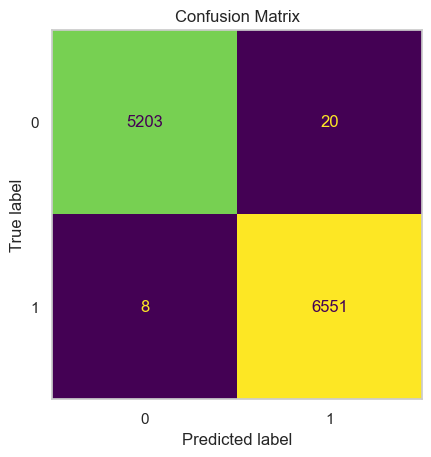

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, best_model.predict(X_test),
                                               labels=best_model.classes_))
disp.plot(colorbar=False)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

#### Feature Importance

In [16]:
feature_importances = best_model.feature_importances_
feature_names = X.columns

pd.DataFrame({'Feature Name': feature_names,
              'Feature Importance': feature_importances}).sort_values('Feature Importance', ascending=False)

,Feature Name,Feature Importance
11,cap-diameter_x_stem-width,0.132329
12,stem-height_x_stem-width,0.104333
5,stem-color,0.104290
3,gill-attachment,0.102778
4,gill-color,0.098643
10,cap-diameter_x_stem-height,0.092577
1,cap-color,0.084807
0,cap-shape,0.080603
7,ring-type,0.058749
2,does-bruise-or-bleed,0.045482


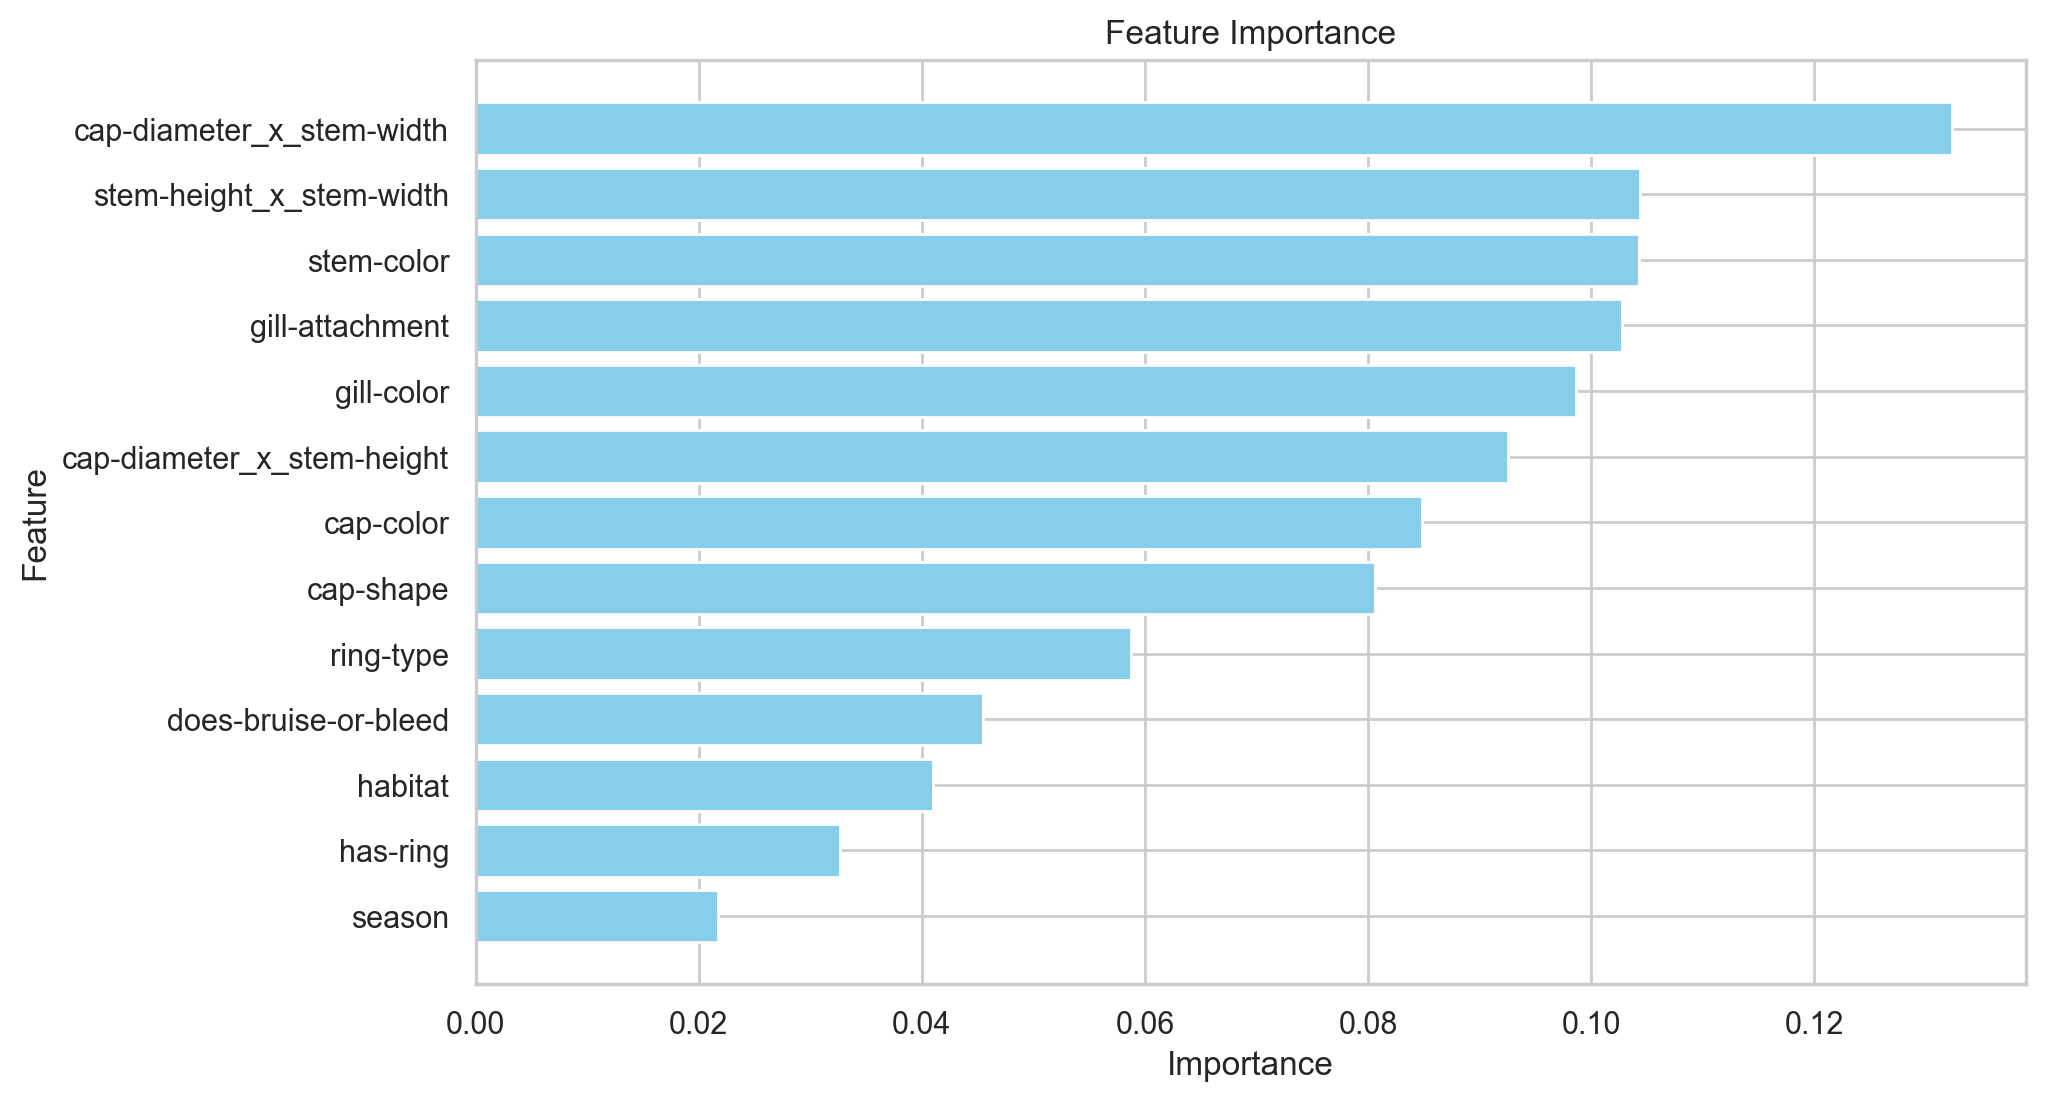

In [17]:
sorted_indices = feature_importances.argsort()
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6), dpi=200)
plt.barh(range(len(sorted_feature_importances)),
         sorted_feature_importances,
         color='skyblue',
         tick_label=sorted_feature_names)

plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Conclusion

<p style="font-size: 20px; font-family:'Times New Roman'">
As I wrap up this project, I find myself immersed in the world of mushrooms, seeking to distinguish the safe from the potentially harmful. Through my journey of exploration and analysis, one algorithm stood out as the clear winner: Random Forest.
    </p>
<p style="font-size: 20px; font-family:'Times New Roman'">
Imagine Random Forest as a team of seasoned forest guides, each offering their unique insights into mushroom identification. Working together, they provide a robust and reliable method for distinguishing between edible and poisonous mushrooms. This collaborative approach not only enhances my understanding of mushrooms but also underscores the importance of teamwork in solving complex problems.
    </p>
<p style="font-size: 20px; font-family:'Times New Roman'">
My findings go beyond mere mushroom classification; they speak to the power of collaboration and shared knowledge. By bringing together different perspectives and approaches, we can achieve remarkable results. In the case of mushroom identification, this means better protecting individuals from accidentally consuming harmful mushrooms and deepening our appreciation for the natural world.
    </p>
<p style="font-size: 20px; font-family:'Times New Roman'">
Looking ahead, there is still much to explore and refine. I can further fine-tune the Random Forest model, unlocking new insights and improving its accuracy. Additionally, I aim to continue bridging the gap between machine learning and biology, opening up new avenues for research and discovery.
    </p>
<p style="font-size: 20px; font-family:'Times New Roman'">
In the end, this project is not just about algorithms and data—it's about my journey of discovery and learning. By combining my curiosity with the power of technology, I can unravel the mysteries of the natural world and contribute to making our planet a safer and more intriguing place to explore.
    </p>
